# Problem Description
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### - SUBMITTED BY AVINASH KUMAR

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',200)

## Step 1: Data understanding

In [5]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#checking for overall info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

#### few columns needs data type correction 

In [7]:
#checking for null value in percentage
round(df.isnull().sum()/len(df) *100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
#checking for the duplicates
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


#### no duplicate columns present in the dataset

In [9]:
df.describe(include=['object'])

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,fc95b223-667b-4559-ade8-443d74919569,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


In [10]:
df.shape

(9240, 37)

## Step 2 : Data Cleaning

In [11]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [12]:
cols = []
for i in df.columns:
    if df[i].nunique()==1:
        cols.append(i)
df.drop(cols,axis=1,inplace=True)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [13]:
df.shape

(9240, 32)

In [14]:
## now drop columns which has Nan value more than 40%
df.drop(df.loc[:,list(round(df.isnull().sum()/len(df)*100,2)>40)].columns,axis=1,inplace=True)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Select,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Select,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Select,Mumbai,No,Modified


In [15]:
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Converted                                         0.00
Total Time Spent on Website                       0.00
Do Not Email                                      0.00
Lead Origin                                       0.00
Lead Number                                       0.00
Do Not Call                                       0.00
Last Notab

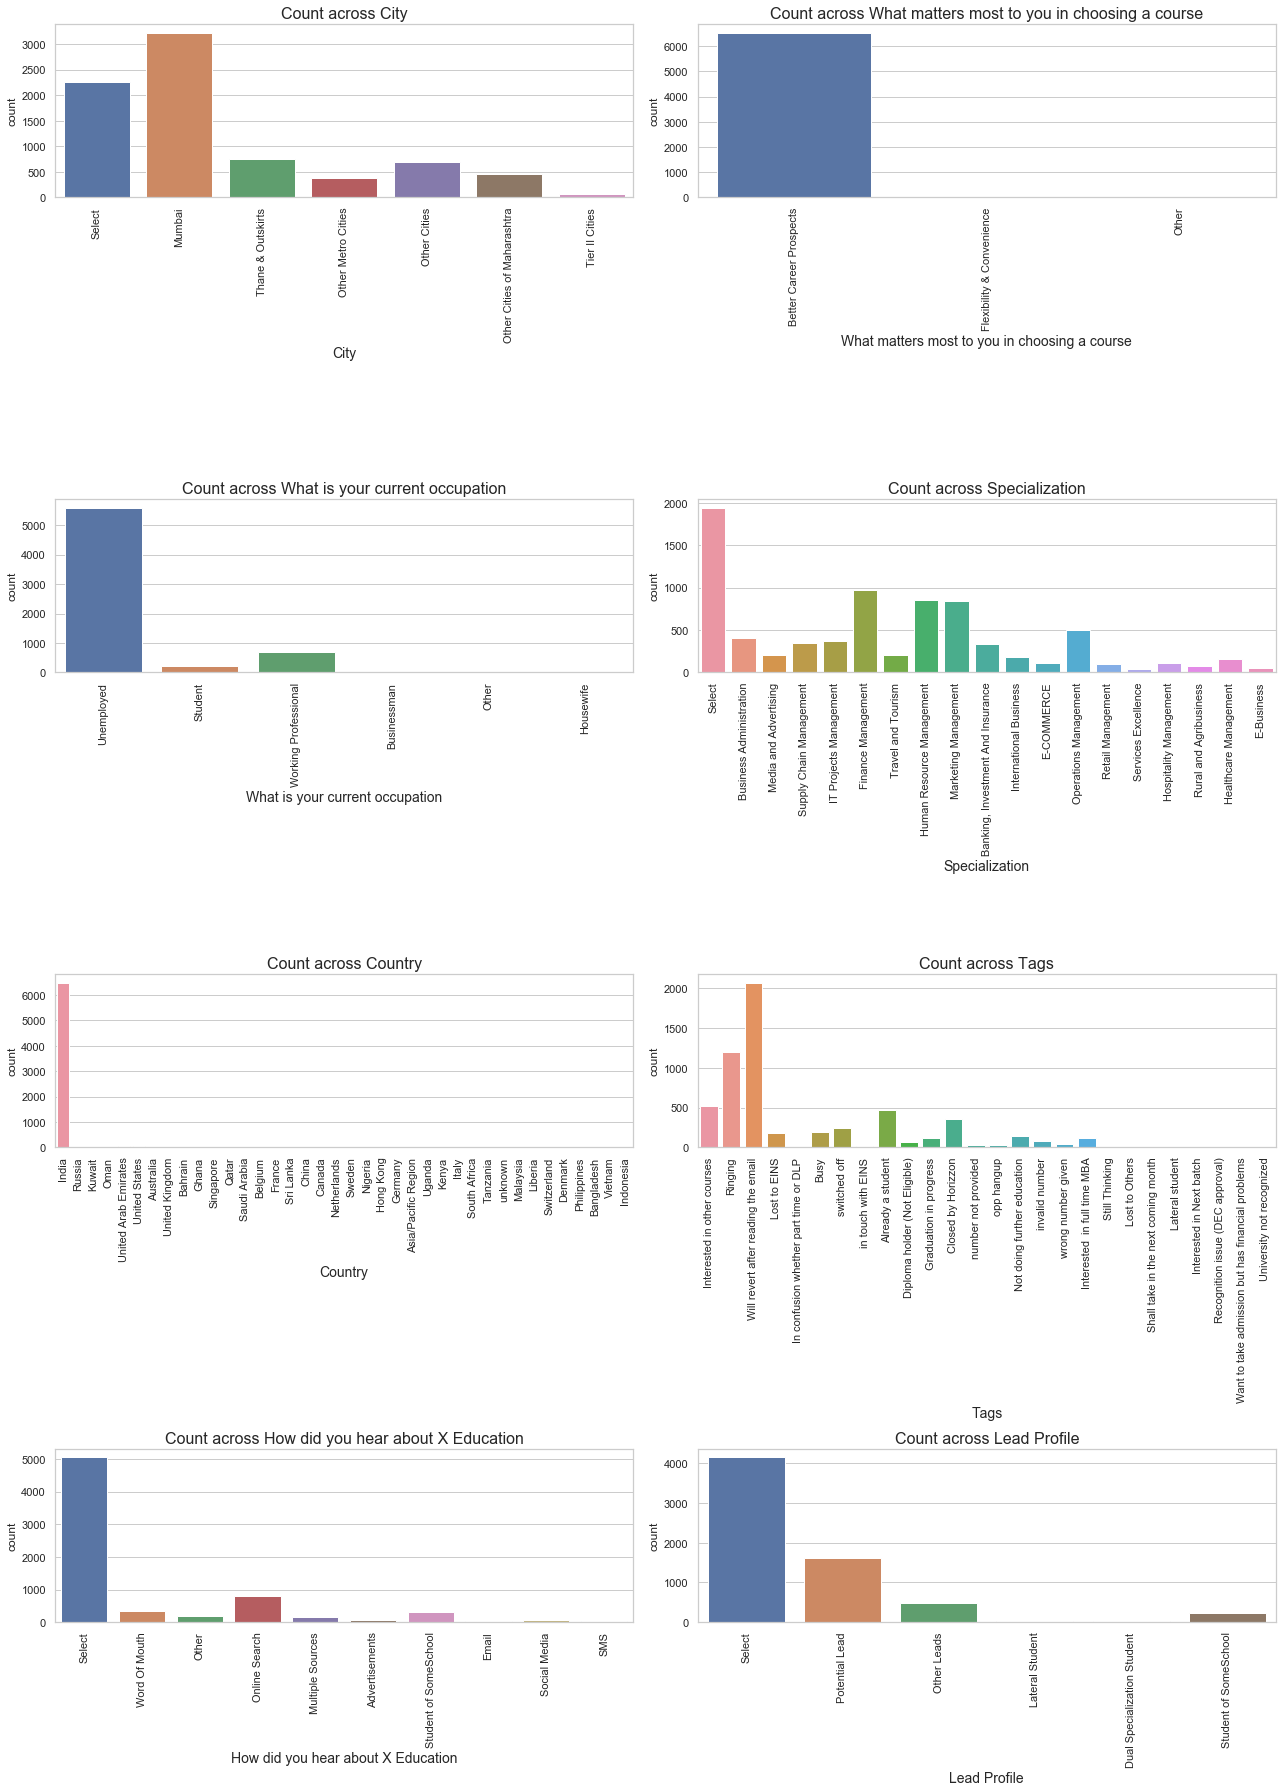

In [16]:
def countplot(x, fig):
    plt.subplot(4,2, fig)
    sns.countplot(df[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(18,25))


countplot('City',1)
countplot('What matters most to you in choosing a course',2)
countplot('What is your current occupation',3)
countplot('Specialization',4)
countplot('Country',5)
countplot('Tags',6)
countplot('How did you hear about X Education',7)
countplot('Lead Profile',8)

plt.tight_layout()
plt.show()

In [17]:
#checking value counts of "City" column
df['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
# Since we are unsure about their city, Let us impute select value by nan.
# Any wrong imputation will lead to focussing on wrong cities,
df['City']= df['City'].replace('Select',np.nan)

In [19]:
#checking value counts of "City" column
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
#### lets impute the missing value as mode coz we can see the significant perecentage of people are from mumbai
df['City'].fillna(df['City'].mode()[0],inplace=True)
df['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
### Now lets check specialisation
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
# Since we are unsure about their specialisation, Let us impute select value by nan.
# Any wrong imputation will lead to focussing on wrong cities,
df['Specialization']= df['Specialization'].replace('Select',np.nan)

In [23]:
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
#### Now lets club all the managemnet program into one category called management
manage =['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management']
df['Specialization'] = df['Specialization'].replace(manage,'Management')
#### lets club e-commerce and e buisness together into one subset as E-Buisness
df['Specialization'] =df['Specialization'].replace('E-COMMERCE','E-Buisness')

In [25]:
df['Specialization'].value_counts(dropna=False)

Management                           4253
NaN                                  3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-Buisness                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [26]:
#### now we can safely impute nan as Mnagement as its most occuring
df['Specialization'].fillna(df['Specialization'].mode()[0],inplace=True)

In [27]:
#### lets check again whats all are left for imputing

In [28]:
df['How did you hear about X Education'].value_counts(dropna=True)

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [29]:
df.drop(axis=1,columns='How did you hear about X Education',inplace=True)

In [30]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Nigeria                    4
Canada                     4
South Africa               4
Kuwait                     4
Sweden                     3
China                      2
Italy                      2
Bangladesh                 2
Uganda                     2
Asia/Pacific Region        2
Ghana                      2
Philippines                2
Netherlands                2
Belgium                    2
Tanzania                   1
Liberia                    1
Sri Lanka                  1
Switzerland                1
Russia                     1
Denmark       

In [31]:
#### we can easily impute the nan value with india as india appears to occur most of time
df['Country'].fillna(df['Country'].mode()[0],inplace=True)

In [32]:
### now lets check up with current occupation
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
#### we can easily impute the nan value with unemployed as its appears to occur most of time
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0],inplace=True)
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [35]:
#### we can easily impute the nan value with unemployed as its appears to occur most of time
df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0],inplace=True)
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
df['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [37]:
df['Lead Profile'] = df['Lead Profile'].replace('Select',np.nan)
df['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [38]:
#### lets drop this column as significant no of values are missing
df.drop(columns='Lead Profile',axis=1,inplace=True)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [39]:
### lets drop Prospect ID as its a just a indication/identification of a specific customer which can be seen by Lead Number
df.drop(columns='Prospect ID',axis=1,inplace=True)
df.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened


In [40]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [41]:
#Tags assigned to customers indicate the current status of the lead.
# Let us club all the Similar tags in one category 

df['Tags'] = df['Tags'].replace(['invalid number','wrong number given','number not provided'],'No phone number')
df['Tags'] = df['Tags'].replace(['Lost to EINS','Lost to Others'],'Lost')
df['Tags'] = df['Tags'].replace(['Ringing','switched off','Busy','opp hangup'],'Try Calling again')
df['Tags'] = df['Tags'].replace(['Not doing further education','Diploma holder (Not Eligible)'],'Not Interested/Not Eligible')

In [42]:
# Let us observe the the value counts again
df['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Try Calling again                                    1662
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
Not Interested/Not Eligible                           208
Lost                                                  182
No phone number                                       157
Interested  in full time MBA                          117
Graduation in progress                                111
in touch with EINS                                     12
Still Thinking                                          6
Want to take admission but has financial problems       6
In confusion whether part time or DLP                   5
Interested in Next batch                                5
Lateral student                                         3
University not

In [43]:
#Tags assigned to customers indicating the current status of the lead.
#we can assume that the customer might not be interested and he will revert after wards and we can simply impute this column by mode
print("Before Imputing Tags Column, No. of Missing values is :",df['Tags'].isnull().sum())
df['Tags'] = df['Tags'].replace(np.nan,'Others')
print("After Imputing Tags Column, No. of Missing values is :",df['Tags'].isnull().sum())

Before Imputing Tags Column, No. of Missing values is : 3353
After Imputing Tags Column, No. of Missing values is : 0


In [44]:
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False).head()

TotalVisits              1.48
Page Views Per Visit     1.48
Last Activity            1.11
Lead Source              0.39
Last Notable Activity    0.00
dtype: float64

In [45]:
df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [46]:
# Let us categorize all the last activities that have very few counts into one category as `Others`
# Since their count is very low, clubbing them together in one category would be more helpful in analysis
combine =['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow','Unreachable','Unsubscribed']
df['Last Activity'] = df['Last Activity'].replace(combine,'others')


In [47]:
df['Last Activity'].value_counts(dropna = False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
others                        205
Form Submitted on Website     116
NaN                           103
Name: Last Activity, dtype: int64

In [48]:
# imputation for 'Last Activity' column
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')

In [49]:
#Lets us now again check the null percentage
round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False).head()

TotalVisits                               1.48
Page Views Per Visit                      1.48
Lead Source                               0.39
Last Notable Activity                     0.00
A free copy of Mastering The Interview    0.00
dtype: float64

In [50]:
# Let us check the column Lead Source
df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
blog                    1
welearnblog_Home        1
WeLearn                 1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [51]:
# let us club similar categories to avoid confusion
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
# Let us Combine Sources that have less value counts to simplify our analysis.
less_count = ['bing','Click2call','Live Chat','Press_Release','welearnblog_Home','blog','testone','NC_EDM','youtubechannel','Pay per Click Ads','WeLearn']
df['Lead Source'] = df['Lead Source'].replace(less_count,'Others')

In [52]:
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')

In [53]:
#Lets us now again check the null percentage
round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False).head()

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Notable Activity                     0.00
A free copy of Mastering The Interview    0.00
Lead Origin                               0.00
dtype: float64

In [54]:
#We choose to drop these rows as they are very less nearly 2%
print("Shape of Data Before Dropping rows ",df.shape)

a = df.shape[0]
df.dropna(inplace = True)
print("shape of Data After Dropping rows ",df.shape)

print("Percentage of Information Loss", round(100*((a-df.shape[0])/a),2))

Shape of Data Before Dropping rows  (9240, 24)
shape of Data After Dropping rows  (9103, 24)
Percentage of Information Loss 1.48


In [55]:
#checking missing values in leftover columns/

round(100*(df.isnull().sum()/len(df.index)),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

#### There are no missing value in our dataframe

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 24 columns):
Lead Number                                      9103 non-null int64
Lead Origin                                      9103 non-null object
Lead Source                                      9103 non-null object
Do Not Email                                     9103 non-null object
Do Not Call                                      9103 non-null object
Converted                                        9103 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9103 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9103 non-null object
Country                                          9103 non-null object
Specialization                                   9103 non-null object
What is your current occupation                  9103 

In [57]:
# We obsserve that TotalVisits have wrong data type
df['TotalVisits'] = df['TotalVisits'].astype('int64')

In [58]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0,0,0.0,Page Visited on Website,India,Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,No,0,5,674,2.5,Email Opened,India,Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Try Calling again,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0,others,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Try Calling again,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2,1428,1.0,Converted to Lead,India,Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [59]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [60]:
# Let us combine together all those categories whose have very few last notable ativity count

low_count = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website',
'Resubscribed to emails','Approached upfront','Email Received','View in browser link Clicked']
df['Last Notable Activity'] = df['Last Notable Activity'].replace(low_count,'Other')

In [61]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: Last Notable Activity, dtype: int64

## Step 3 : Data visualisation and outlier treatment

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 24 columns):
Lead Number                                      9103 non-null int64
Lead Origin                                      9103 non-null object
Lead Source                                      9103 non-null object
Do Not Email                                     9103 non-null object
Do Not Call                                      9103 non-null object
Converted                                        9103 non-null int64
TotalVisits                                      9103 non-null int64
Total Time Spent on Website                      9103 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9103 non-null object
Country                                          9103 non-null object
Specialization                                   9103 non-null object
What is your current occupation                  9103 no

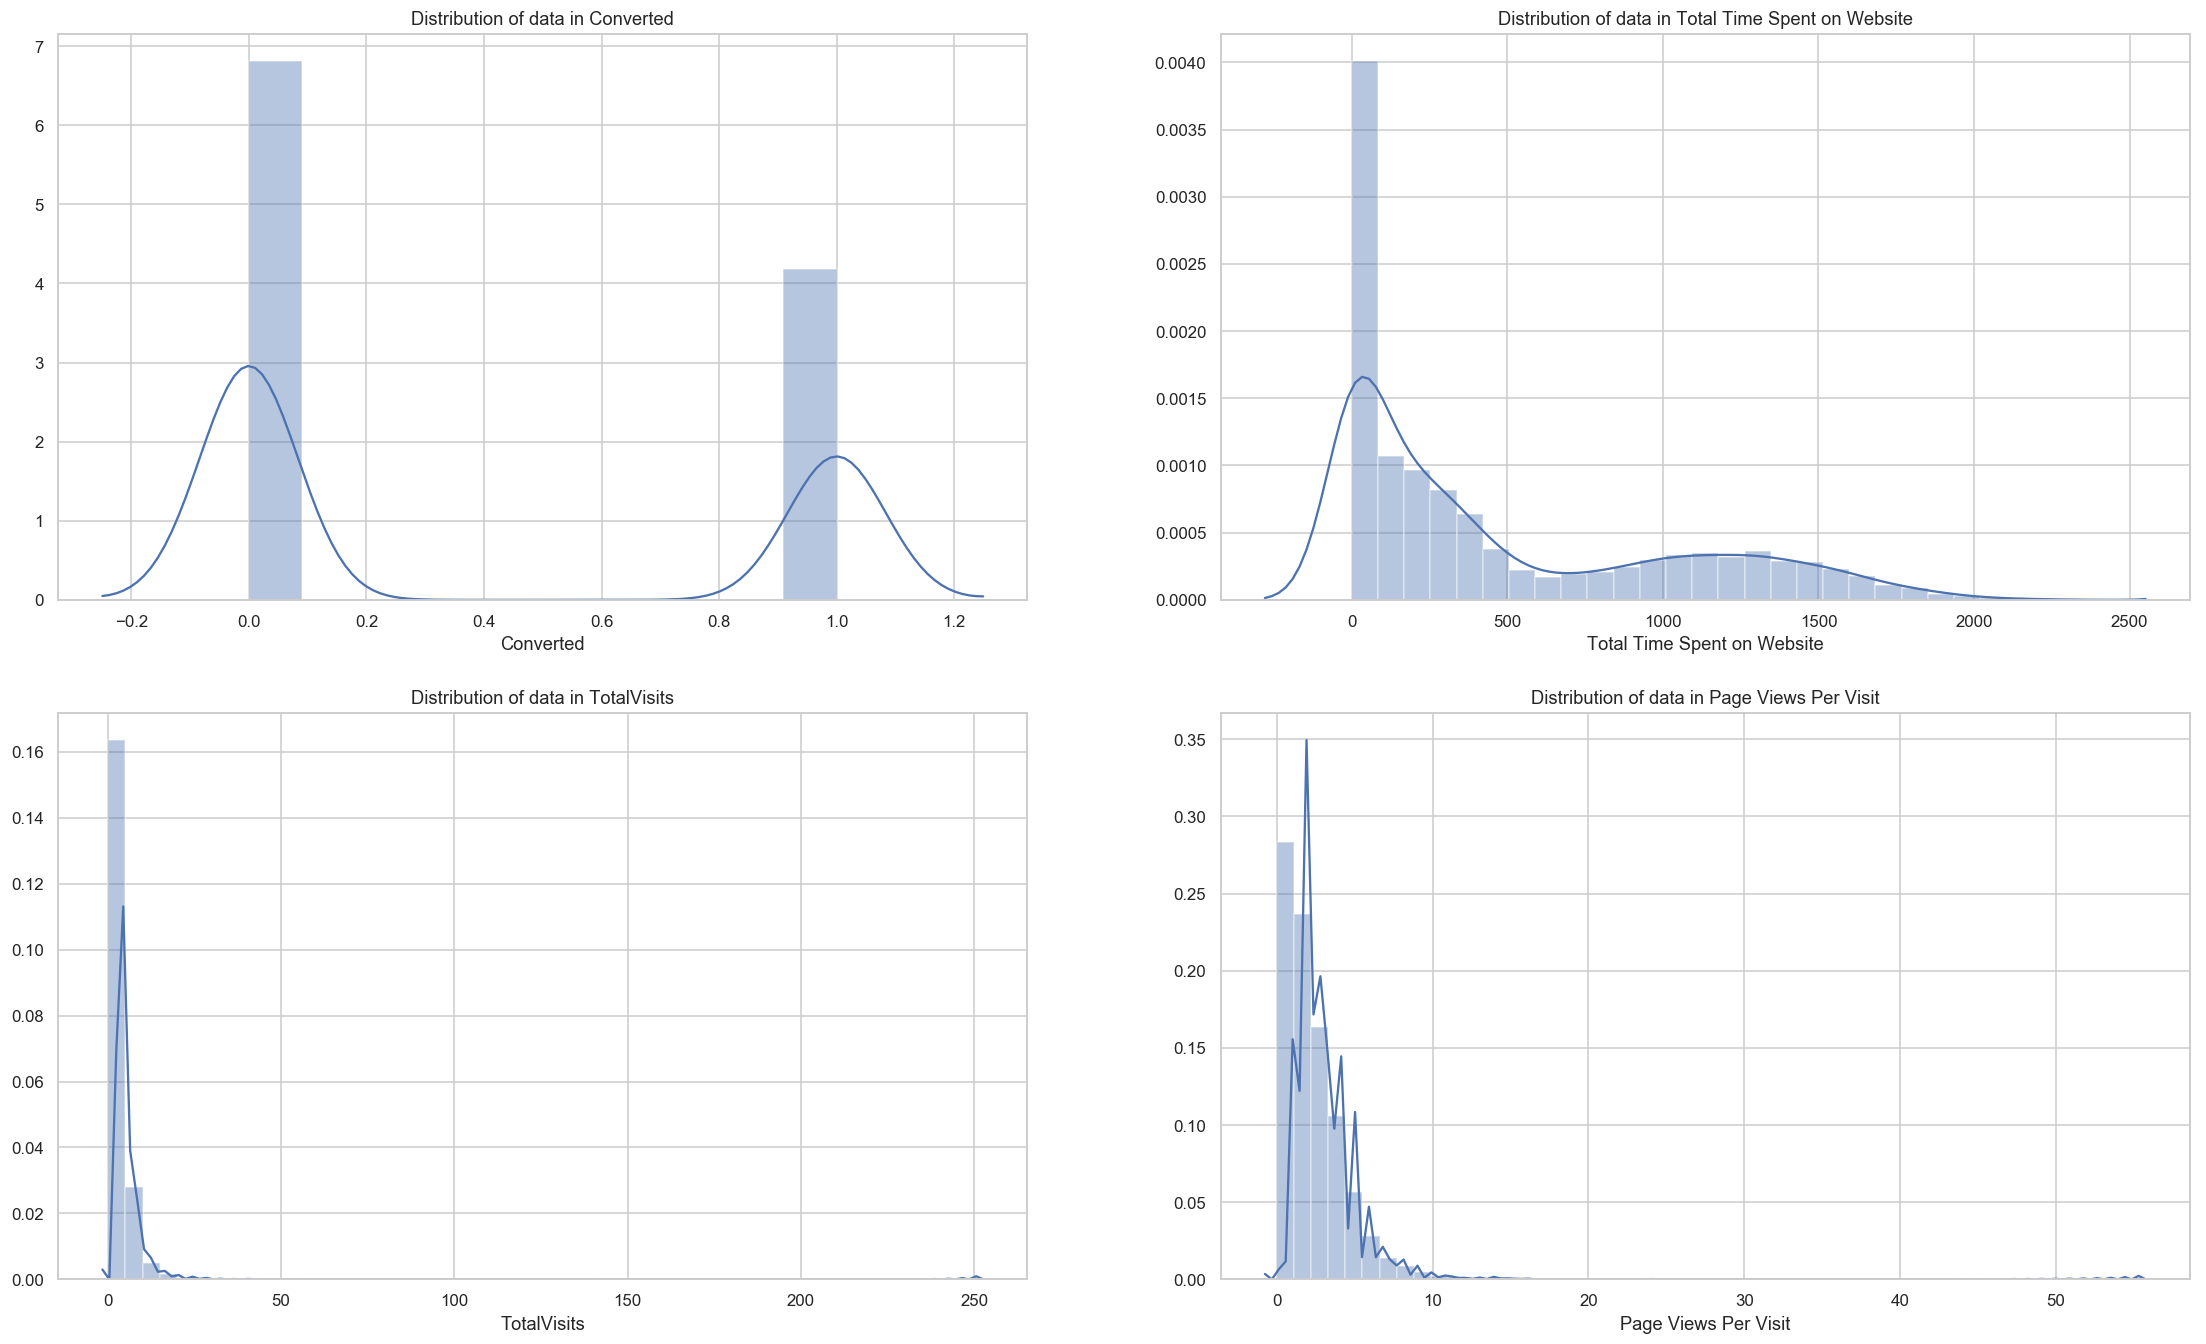

<Figure size 432x288 with 0 Axes>

In [63]:
### lets check numerical columns first
def plot(x,fig):
    plt.subplot(2,2,fig)
    sns.distplot(df[x])
    plt.title('Distribution of data in' + ' ' + x)
    plt.xlabel(x)

plt.figure(figsize=(25,15),dpi=110)

plot('Converted',1)
plot('Total Time Spent on Website',2)
plot('TotalVisits',3)
plot('Page Views Per Visit',4)

plt.show()
plt.tight_layout()

In [64]:
#### checking the imbalance in our data
round(sum(df['Converted'])/len(df)*100,2)

38.02

#### We can see the imbalance present in the data as the is more biased towards the leads which are not converted

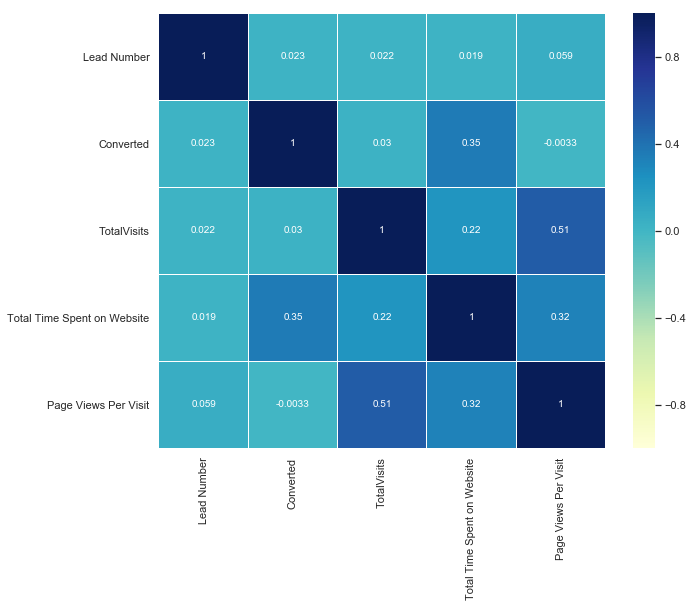

In [65]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

#### variables are not highly corelated with each other!!!

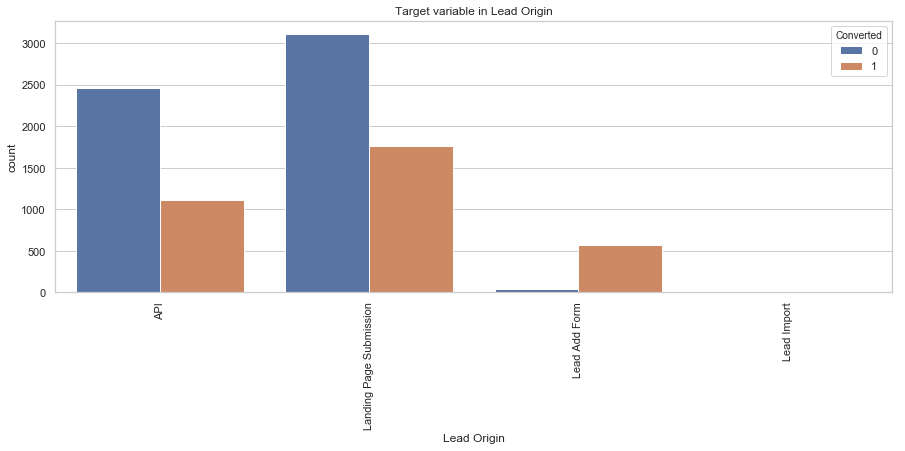

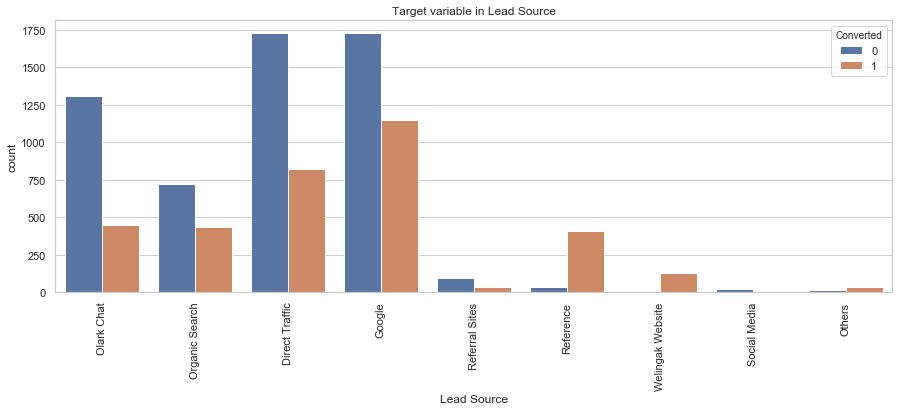

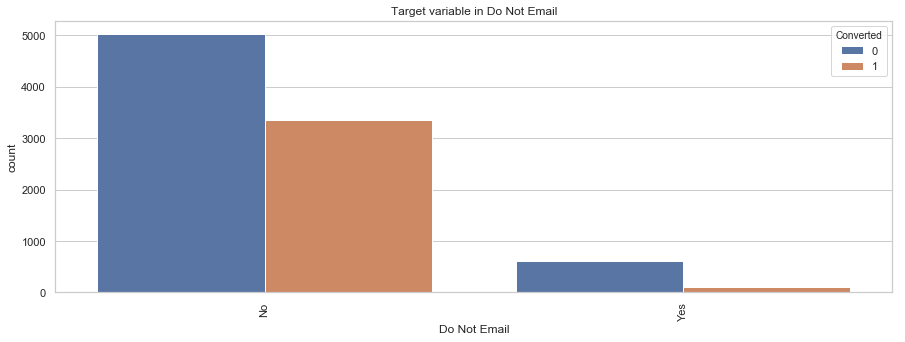

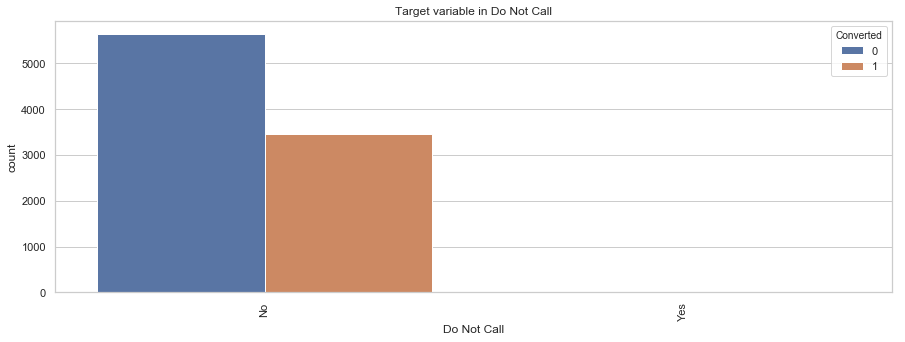

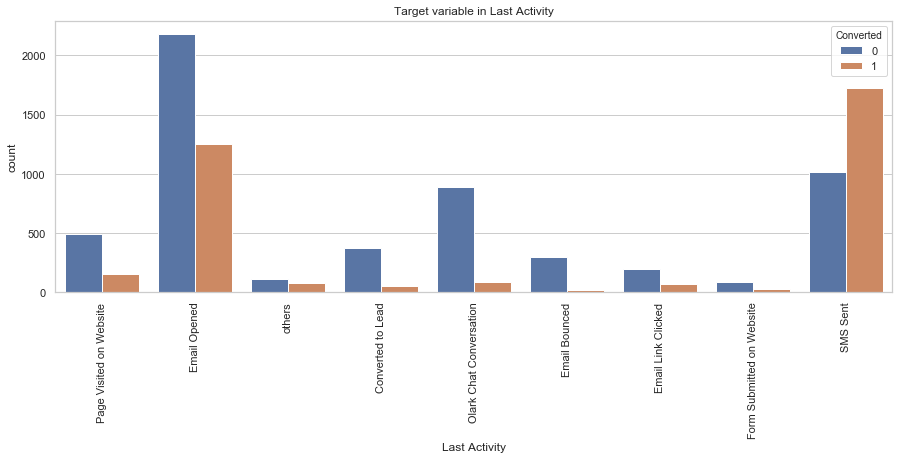

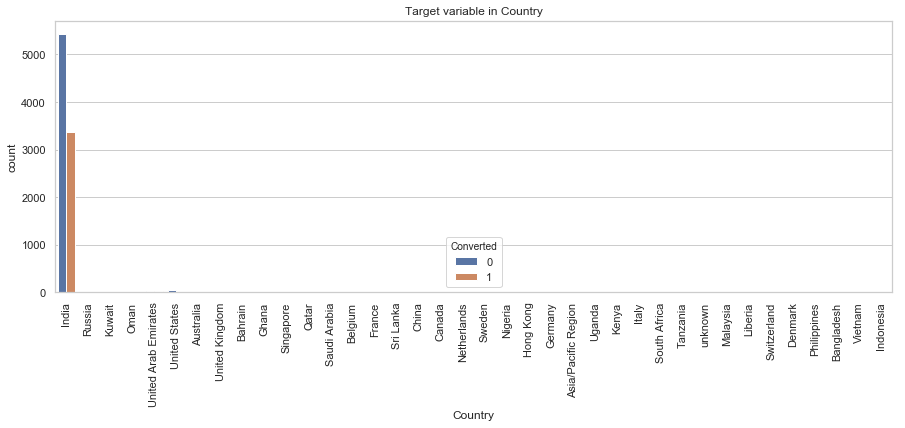

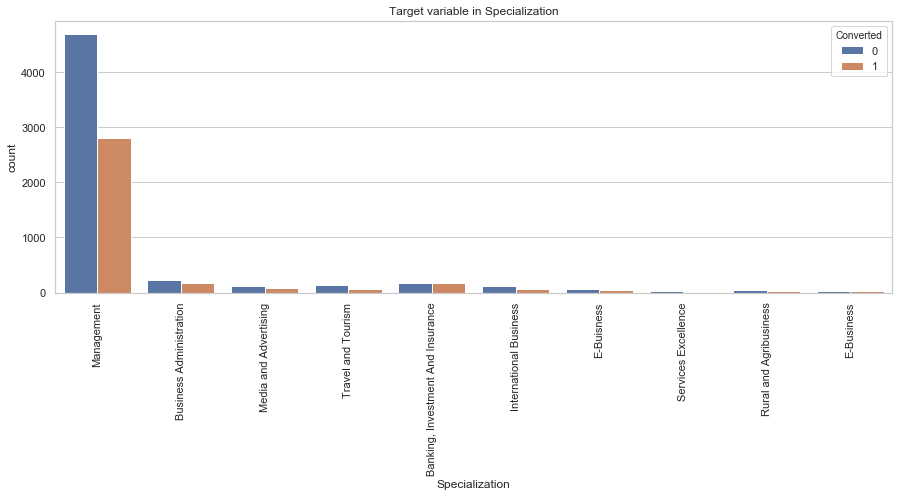

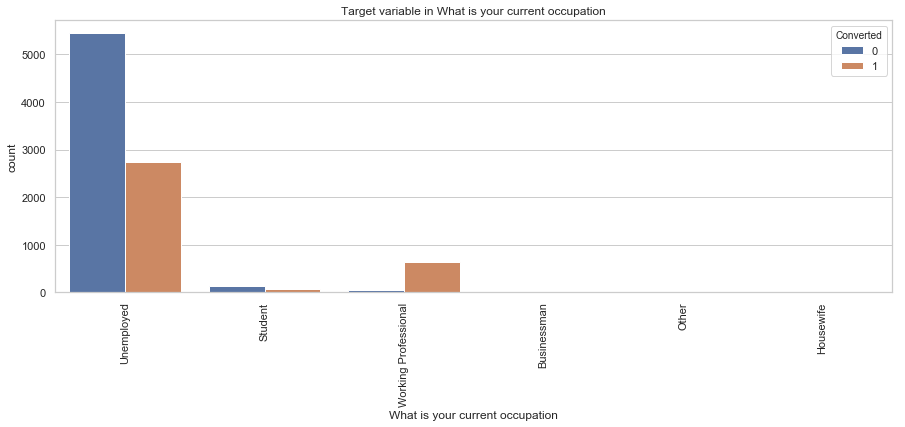

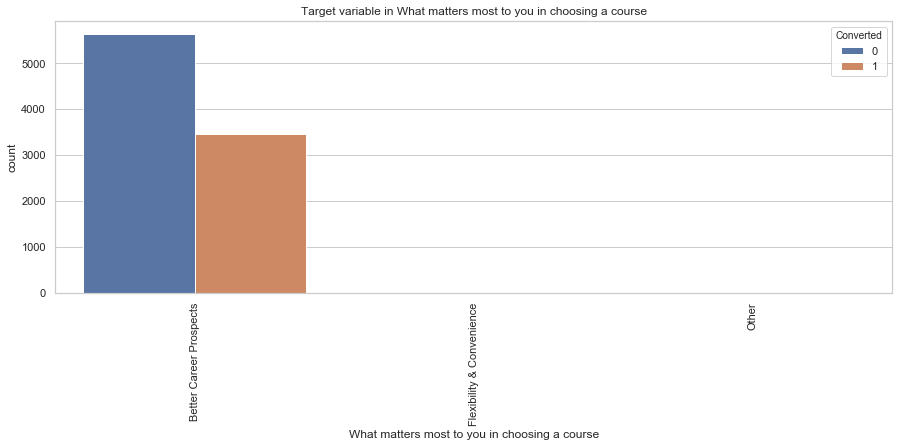

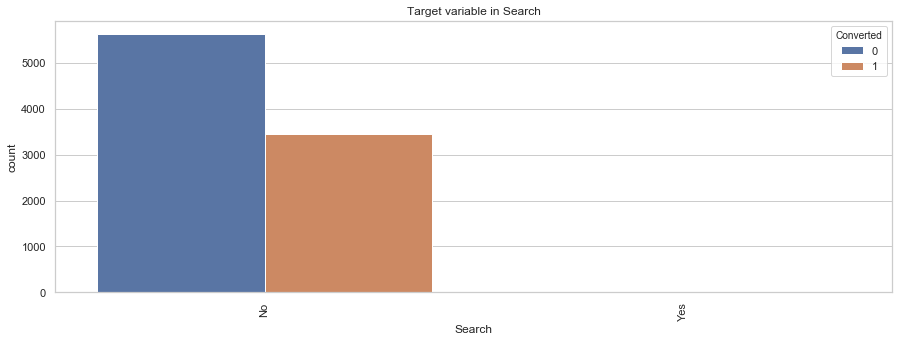

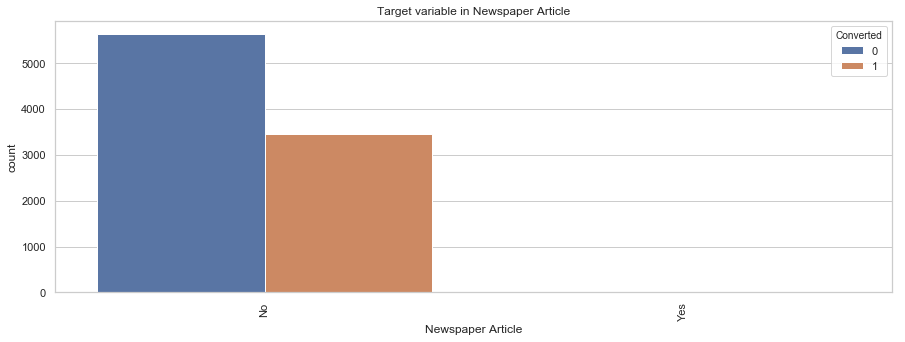

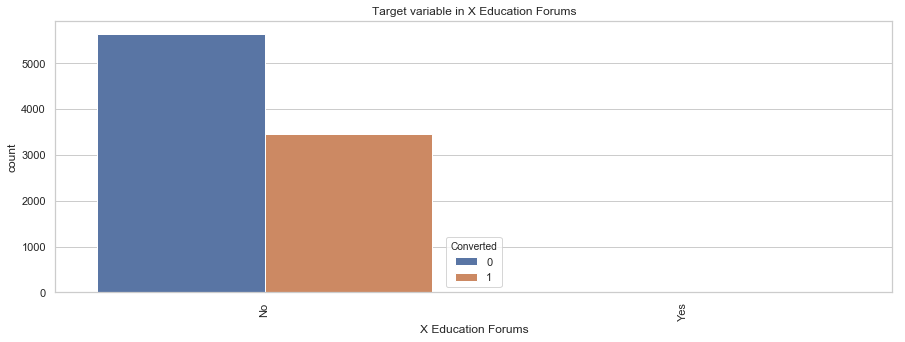

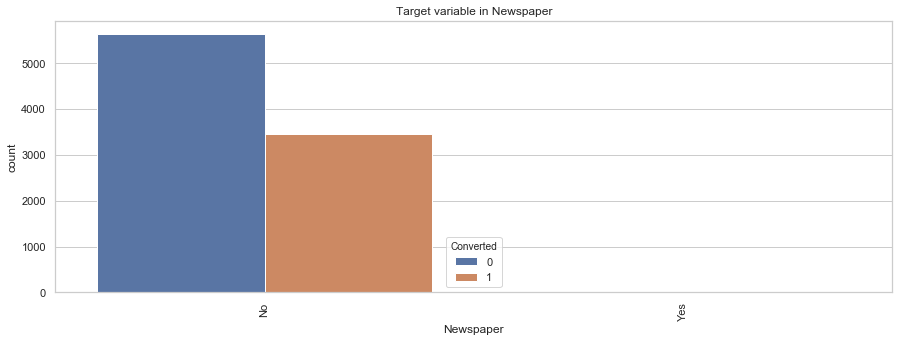

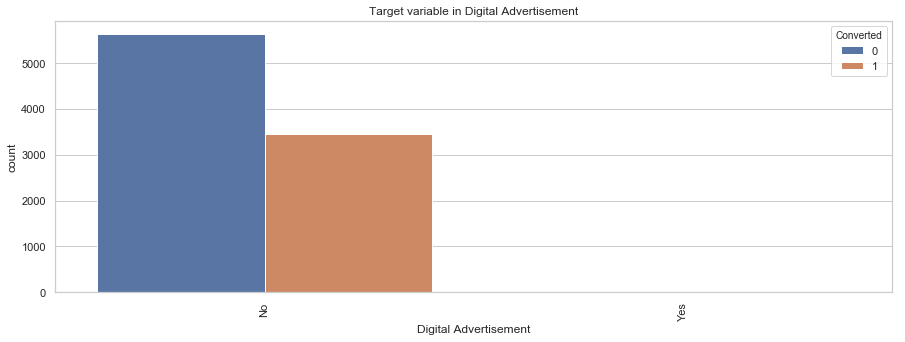

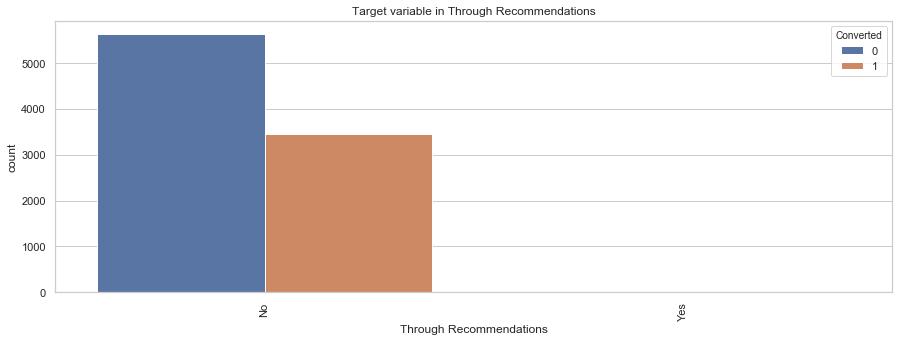

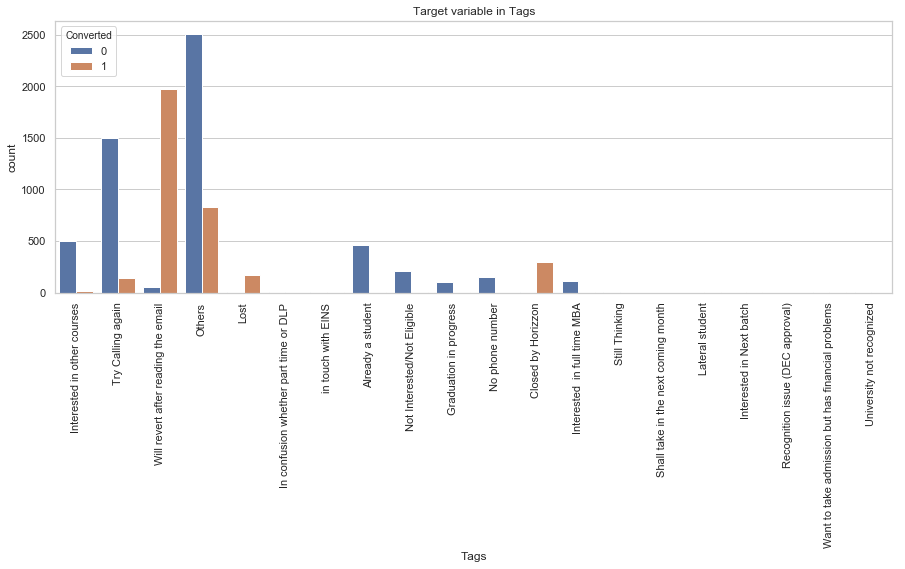

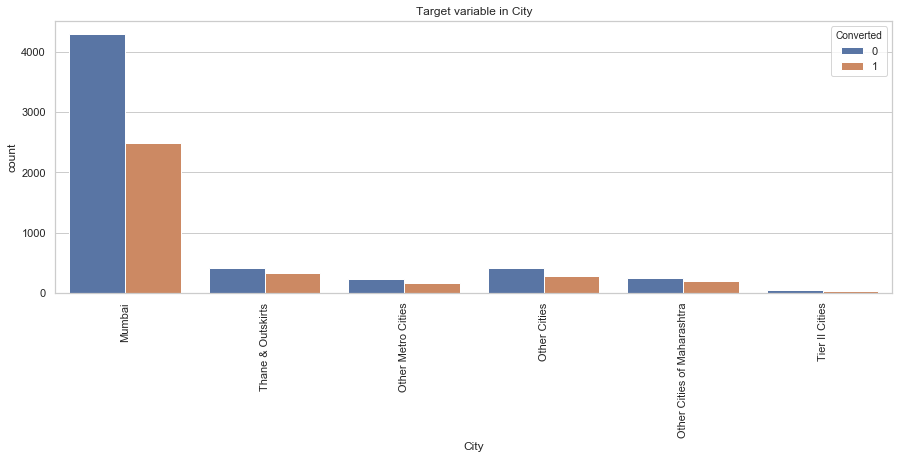

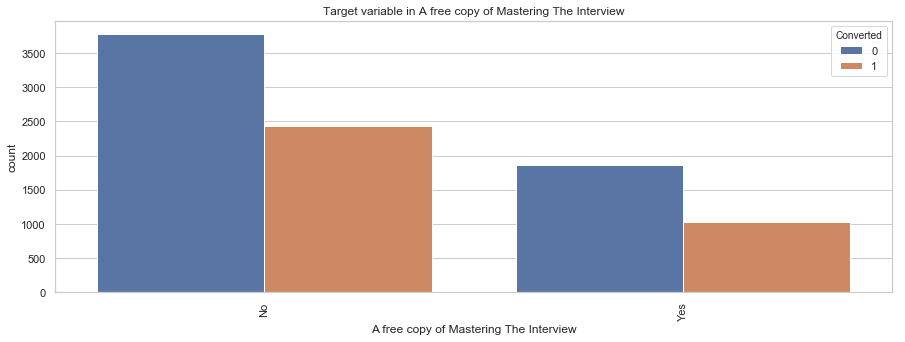

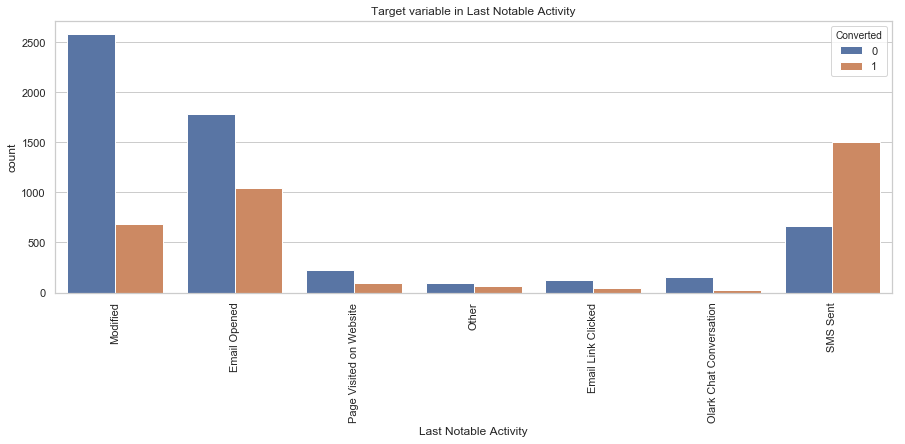

In [66]:
conv = df.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(df[i], hue=df.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

#### Handling high data imbalance

From the above plots, We can observe that there is data imbalance in some columns. These will give biased results. Hence it is better to drop them:<br>

 - 'Do Not Call'
 - 'Country'
 - 'Search',
 - 'Newspaper Article', 
 - 'X Education Forums', 
 - 'Newspaper',
 - 'Digital Advertisement', 
 - 'Through Recommendations'
 - 'What matters most to you in choosing a course'

In [67]:
# Dropping the column 'country'
imbalance_data = ['Do Not Call','Country','Search','Newspaper Article','X Education Forums','Newspaper',
                  'Digital Advertisement', 'Through Recommendations','What matters most to you in choosing a course']
df = df.drop(imbalance_data,axis =1)

In [68]:
df.shape

(9103, 15)

 **<b>3.  Visualizing Numerical variables </b>**- 

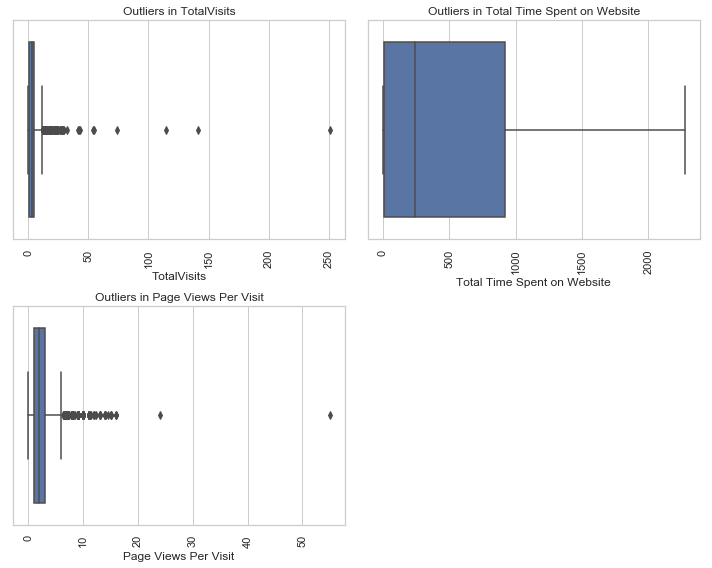

In [69]:
def boxplot(x,fig,):
    plt.subplot(2,2,fig)
    sns.boxplot(x = x, data = df)
    plt.title('Outliers in'+' '+ x)
    plt.xlabel(x)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

<a> We Observe Some extreme values in : Total Visits  & Page Views per visit. Let us use statistical method to check outliers

In [70]:
# Checking percentile values 
df[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,481.350104,3.445238,2.362820
std,545.066142,4.854853,2.161418
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,9.000000,1.000000,1.000000
50%,244.000000,3.000000,2.000000
75%,919.500000,5.000000,3.000000
90%,1372.000000,7.000000,5.000000


In [71]:
# removing outliers using the IQR
Q1 = df['TotalVisits'].quantile(0.01)
Q3 = df['TotalVisits'].quantile(0.99)
df = df.loc[(df['TotalVisits'] >= Q1) & (df['TotalVisits'] <= Q3)]

Q1 = df['Page Views Per Visit'].quantile(0.01)
Q3 = df['Page Views Per Visit'].quantile(0.99)
df=df.loc[(df['Page Views Per Visit'] >= Q1) & (df['Page Views Per Visit'] <= Q3)]

Q1 = df['Total Time Spent on Website'].quantile(0.01)
Q3 = df['Total Time Spent on Website'].quantile(0.99)
df=df.loc[(df['Total Time Spent on Website'] >= Q1) & (df['Total Time Spent on Website'] <= Q3)]

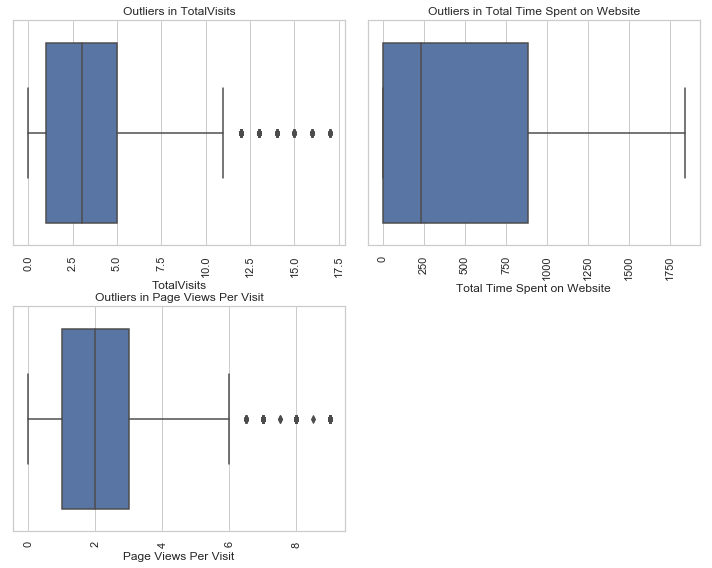

In [72]:
## After Treatment of outliers
plt.figure(figsize =(10,8))
                         
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

<b> b.) Bivariate Analysis - Visualizing Numerical Columns with Target Column

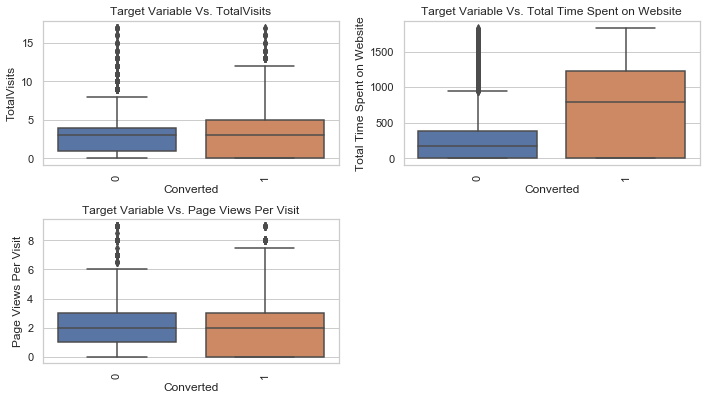

In [73]:
def boxplot(y,fig):
    plt.subplot(3,2,fig)
    sns.boxplot(x = 'Converted', y = y, data = df)
    plt.title('Target Variable Vs.'+' '+ y)
    plt.xlabel('Converted')
    plt.ylabel(y)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         

boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

###  **Inferences**
   
 - Total Visits & Page Views Per Visit
     - Median for both types of Leads : converted and non converted are similar.
     - Nothing can be concluded from them.
 - Total Time Spent on website
     - Leads who spend more time on the X education website, have more chances of converting.


##  4. Data Preparation

In [74]:
df_1 = df.copy()

In [75]:
df_1.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0,0,0.0,Page Visited on Website,Management,Unemployed,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,0,5,674,2.5,Email Opened,Management,Unemployed,Try Calling again,Mumbai,No,Email Opened


In [76]:
### lets convert binary categorical variable yes/no to 0/1
def binary(x):
    return x.map({'Yes':1,'No':0})

In [77]:
cols=['A free copy of Mastering The Interview','Do Not Email']
df_1[cols] = df_1[cols].apply(binary)
df_1.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Management,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Management,Unemployed,Try Calling again,Mumbai,0,Email Opened


In [78]:
# Creating dummy variables for the categorical variables and droppong the first one
cols1 = [i for i in df_1.select_dtypes(include ='object').columns if len(df_1[i].value_counts()) >2 and i != 'Lead Number']

dummy1 = pd.get_dummies(df[cols1], drop_first= True)

In [79]:
#concatenating the dummy variables with Original DataFrame
df_1 = pd.concat([df_1,dummy1], axis =1)
df_1.shape

(8863, 78)

In [80]:
cols1 = [i for i in df_1.select_dtypes(include ='object').columns if len(df_1[i].value_counts()) >2 and i != 'Prospect ID']

#Dropping the variables which were converted into Dummies
df_1.drop(cols1, axis =1, inplace = True)
df_1.shape

(8863, 70)

In [81]:
#Seprarting Target Column from original Dataframe.
y = df_1['Converted']
X = df_1.drop(['Converted','Lead Number'],axis = 1)

In [82]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [83]:
X.shape

(8863, 68)

In [84]:
### splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [85]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6204, 68)
y_train Size (6204,)


#### looks fair enough

## Step 5:Features Scalling


In [86]:
df_1.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Buisness,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,660728,0,0,5,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,660727,0,1,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,0,0,1,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,660681,0,1,2,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [87]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

C:\Users\AASTHA\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AASTHA\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Buisness,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5428,0,-1.071483,-0.871984,-1.184151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8583,0,0.641520,2.066787,0.128349,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
4637,0,-0.386282,-0.740141,-0.134151,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4468,0,-0.043681,-0.205124,0.390849,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2058,0,1.326721,-0.583457,-0.449151,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Step 6: Model Buiding

In [88]:
logreg = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6135
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1222.6
Date:                Tue, 13 Jul 2021   Deviance:                       2445.1
Time:                        17:21:08   Pearson chi2:                 7.64e+03
No. Iterations:                    22   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -7.0387      5.663     -1.243      0.214     -18.139       4.061
Do Not Email                                              -0.6624      0.291     -2.279      0.023      -1.232      -0.093
TotalVisits                                                0.2633      0.081      3.236      0.001       0.104       0.423
Total Time Spent on Website                                1.1014      0.062     17.639      0.000       0.979       1.224
Page Views Per Visit                                      -0.2168      0.094     -2.299      0.021      -0.402      -0.032
A free copy of Mastering The Interview                    -0.1369      0.174     -0.786      0.432      -0.478       0.204
Lead Origin_Landing Page Submission                       -0.2795      0.176     -1.587      0.112      -0.625       0.066
Lead Origin_Lead Add Form                                  1.5456      1.156      1.337      0.181      -0.721       3.812
Lead Origin_Lead Import                                  -17.8996   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                         0.1865      0.184      1.011      0.312      -0.175       0.548
Lead Source_Olark Chat                                     1.3999      0.249      5.617      0.000       0.911       1.888
Lead Source_Organic Search                                -0.0624      0.217     -0.287      0.774      -0.488       0.363
Lead Source_Others                                         1.3390      0.955      1.401      0.161      -0.534       3.212
Lead Source_Reference                                     -0.7035      1.224     -0.575      0.565      -3.102       1.695
Lead Source_Referral Sites                                 0.3725      0.446      0.835      0.403      -0.501       1.246
Lead Source_Social Media                                  18.7954   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                               4.0537      1.374      2.949      0.003       1.360       6.748
Last Activity_Email Bounced                               -1.0309      0.717     -1.439      0.150      -2.435       0.374
Last Activity_Email Link Clicked                           1.0860      0.600      1.810      0.070      -0.090       2.262
Last Activity_Email Opened                                 0.3140      0.410      0.767      0.443      -0.489       1.117
Last Activity_Form Submitted on Website                    1.0186      0.625      1.631      0.103      -0.205       2.243
Last Activity_Olark Chat Conversation                     -0.4404      0.425     -1.037      0.300      -1.273       0.392
Last Activity_Page Visited on Website                      0.0350      0.527      0.066

In [89]:
logreg = LogisticRegression(class_weight = 'balanced')
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [90]:
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False])

In [91]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 10),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 53),
 ('Lead Source_Others', False, 7),
 ('Lead Source_Reference', False, 13),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Social Media', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 54),
 ('Last Activity_Email Opened', False, 16),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Olark Chat Conversation', False, 6),
 ('Last Activity_Page Visited on Website', False, 49),
 ('Last Activity_SMS Sent', True, 1),
 ('Las

In [92]:
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost',
       'Tags_No phone number', 'Tags_Not Interested/Not Eligible',
       'Tags_Others', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

<b id ='6'> b.) Building model using GLM for the detailed statistics

##### MODEL 1

In [93]:
logreg1 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family=sm.families.Binomial())
res = logreg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1278.3
Date:                Tue, 13 Jul 2021   Deviance:                       2556.6
Time:                        17:21:10   Pearson chi2:                 7.91e+03
No. Iterations:                    19   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.8966      0.146    -26.712      0.000      -4.183      -3.611
Total Time Spent on Website                       1.0922      0.060     18.323      0.000       0.975       1.209
Lead Origin_Lead Add Form                         1.4772      0.365      4.052      0.000       0.763       2.192
Lead Source_Olark Chat                            1.4486      0.144     10.030      0.000       1.166       1.732
Lead Source_Welingak Website                      4.0652      0.814      4.995      0.000       2.470       5.660
Last Activity_Email Bounced                      -1.3117      0.494     -2.656      0.008      -2.280      -0.344
Last Activity_SMS Sent                            2.0147      0.115     17.595      0.000       1.790       2.239
Tags_Closed by Horizzon                           9.7733      1.031      9.484      0.000       7.753      11.793
Tags_Lateral student                             23.7549   1.25e+04      0.002      0.998   -2.45e+04    2.46e+04
Tags_Lost                                         7.3459      0.446     16.457      0.000       6.471       8.221
Tags_No phone number                             -2.2751      1.039     -2.189      0.029      -4.312      -0.238
Tags_Not Interested/Not Eligible                 -0.3332      0.775     -0.430      0.667      -1.852       1.185
Tags_Others                                       2.1592      0.136     15.835      0.000       1.892       2.426
Tags_Will revert after reading the email          6.8125      0.225     30.235      0.000       6.371       7.254
Last Notable Activity_Modified                   -1.7525      0.129    -13.615      0.000      -2.005      -1.500
Last Notable Activity_Olark Chat Conversation    -2.2040      0.460     -4.792      0.000      -3.105      -1.303
=================================================================================================================
"""

In [94]:
#Calculate VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.85
2,Lead Source_Olark Chat,1.65
11,Tags_Others,1.64
12,Tags_Will revert after reading the email,1.60
13,Last Notable Activity_Modified,1.50
0,Total Time Spent on Website,1.47
5,Last Activity_SMS Sent,1.44
3,Lead Source_Welingak Website,1.36
6,Tags_Closed by Horizzon,1.22
4,Last Activity_Email Bounced,1.11


#### MODEL 2

In [95]:
cols = cols.drop('Tags_Lateral student')
logreg2 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family=sm.families.Binomial())
res1 = logreg2.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1284.7
Date:                Tue, 13 Jul 2021   Deviance:                       2569.5
Time:                        17:21:10   Pearson chi2:                 7.82e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.8805      0.145    -26.758      0.000      -4.165      -3.596
Total Time Spent on Website                       1.0889      0.059     18.321      0.000       0.972       1.205
Lead Origin_Lead Add Form                         1.4718      0.363      4.052      0.000       0.760       2.184
Lead Source_Olark Chat                            1.4553      0.144     10.098      0.000       1.173       1.738
Lead Source_Welingak Website                      4.0739      0.813      5.008      0.000       2.480       5.668
Last Activity_Email Bounced                      -1.3162      0.494     -2.667      0.008      -2.283      -0.349
Last Activity_SMS Sent                            2.0223      0.114     17.705      0.000       1.798       2.246
Tags_Closed by Horizzon                           9.7340      1.030      9.449      0.000       7.715      11.753
Tags_Lost                                         7.3035      0.445     16.395      0.000       6.430       8.177
Tags_No phone number                             -2.2954      1.039     -2.209      0.027      -4.332      -0.259
Tags_Not Interested/Not Eligible                 -0.3559      0.774     -0.460      0.646      -1.874       1.162
Tags_Others                                       2.1313      0.135     15.736      0.000       1.866       2.397
Tags_Will revert after reading the email          6.7806      0.224     30.245      0.000       6.341       7.220
Last Notable Activity_Modified                   -1.7243      0.128    -13.487      0.000      -1.975      -1.474
Last Notable Activity_Olark Chat Conversation    -2.1958      0.459     -4.782      0.000      -3.096      -1.296
=================================================================================================================
"""

In [96]:
#checking vif values
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.852420
2,Lead Source_Olark Chat,1.647983
10,Tags_Others,1.640583
11,Tags_Will revert after reading the email,1.598196
12,Last Notable Activity_Modified,1.497794
0,Total Time Spent on Website,1.469887
5,Last Activity_SMS Sent,1.439220
3,Lead Source_Welingak Website,1.358343
6,Tags_Closed by Horizzon,1.220065
4,Last Activity_Email Bounced,1.109315


#### Model 3

In [97]:
cols = cols.drop("Tags_Not Interested/Not Eligible")
logreg3 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res3 = logreg3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1284.8
Date:                Tue, 13 Jul 2021   Deviance:                       2569.7
Time:                        17:21:11   Pearson chi2:                 7.83e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.8906      0.144    -27.084      0.000      -4.172      -3.609
Total Time Spent on Website                       1.0886      0.059     18.316      0.000       0.972       1.205
Lead Origin_Lead Add Form                         1.4715      0.363      4.050      0.000       0.759       2.184
Lead Source_Olark Chat                            1.4559      0.144     10.100      0.000       1.173       1.738
Lead Source_Welingak Website                      4.0746      0.814      5.008      0.000       2.480       5.669
Last Activity_Email Bounced                      -1.3221      0.492     -2.685      0.007      -2.287      -0.357
Last Activity_SMS Sent                            2.0258      0.114     17.766      0.000       1.802       2.249
Tags_Closed by Horizzon                           9.7457      1.030      9.463      0.000       7.727      11.764
Tags_Lost                                         7.3151      0.445     16.442      0.000       6.443       8.187
Tags_No phone number                             -2.2879      1.039     -2.202      0.028      -4.324      -0.252
Tags_Others                                       2.1404      0.134     15.943      0.000       1.877       2.404
Tags_Will revert after reading the email          6.7914      0.223     30.427      0.000       6.354       7.229
Last Notable Activity_Modified                   -1.7262      0.128    -13.510      0.000      -1.977      -1.476
Last Notable Activity_Olark Chat Conversation    -2.1950      0.459     -4.779      0.000      -3.095      -1.295
=================================================================================================================
"""

In [98]:
#checking vif values
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.852116
2,Lead Source_Olark Chat,1.646940
9,Tags_Others,1.623189
10,Tags_Will revert after reading the email,1.595473
0,Total Time Spent on Website,1.469656
11,Last Notable Activity_Modified,1.462454
5,Last Activity_SMS Sent,1.437847
3,Lead Source_Welingak Website,1.358325
6,Tags_Closed by Horizzon,1.218336
4,Last Activity_Email Bounced,1.087565


## Step 7: Making Predictions on the Train Set

In [99]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res3.predict(X_train_sm)
y_train_pred[:10]

5428    0.223825
8583    0.994238
4637    0.009046
4468    0.122017
2058    0.084299
1720    0.970186
2287    0.048814
1434    0.001612
5553    0.995650
8330    0.994623
dtype: float64

In [100]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22382451, 0.99423817, 0.00904641, 0.1220166 , 0.08429886,
       0.97018619, 0.04881363, 0.00161167, 0.99565023, 0.99462301])

In [101]:
#Creating a dataframe with the actual and the predicted probabilities

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob
0,5428,0,0.223825
1,8583,1,0.994238
2,4637,0,0.009046
3,4468,0,0.122017
4,2058,0,0.084299


In [102]:
#Creating new column 'predicted' with 1 if Probobility > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted
0,5428,0,0.223825,0
1,8583,1,0.994238,1
2,4637,0,0.009046,0
3,4468,0,0.122017,0
4,2058,0,0.084299,0


In [103]:
# Confusion matrix for the target column : `converted `

confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3734  167]
 [ 322 1981]]


In [104]:
#classification report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3901
           1       0.92      0.86      0.89      2303

   micro avg       0.92      0.92      0.92      6204
   macro avg       0.92      0.91      0.91      6204
weighted avg       0.92      0.92      0.92      6204



<a> Summary:
   
 - Accuracy - 92%
 - Precision - 92%
 - Recall - 86%

### Other Metrics

In [105]:
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP = confusion[1,1] # true positive 

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8601823708206687

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.957190463983594

In [108]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.04280953601640605


In [109]:
# positive predictive value 
print (TP / float(TP+FP))

0.9222532588454376


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9206114398422091


In [111]:
#Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

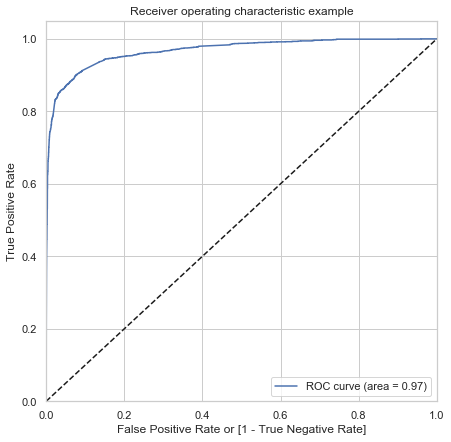

In [113]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [114]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,5428,0,0.223825,0,1,1,1,0,0,0,0,0,0,0
1,8583,1,0.994238,1,1,1,1,1,1,1,1,1,1,1
2,4637,0,0.009046,0,1,0,0,0,0,0,0,0,0,0
3,4468,0,0.122017,0,1,1,0,0,0,0,0,0,0,0
4,2058,0,0.084299,0,1,0,0,0,0,0,0,0,0,0


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.371212  1.000000  0.000000
0.1   0.1  0.824307  0.961355  0.743399
0.2   0.2  0.885074  0.942249  0.851320
0.3   0.3  0.914571  0.900999  0.922584
0.4   0.4  0.917956  0.881459  0.939503
0.5   0.5  0.921180  0.860182  0.957190
0.6   0.6  0.922631  0.839340  0.971802
0.7   0.7  0.909736  0.785497  0.983081
0.8   0.8  0.903449  0.760747  0.987695
0.9   0.9  0.886202  0.705601  0.992822


<Figure size 864x432 with 0 Axes>

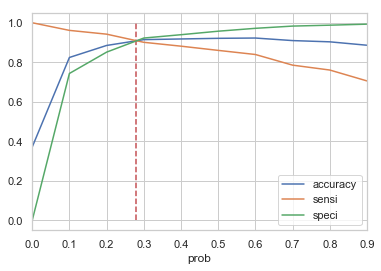

In [116]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (12,6))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.28,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

In [117]:
#### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,5428,0,0.223825,0,1,1,1,0,0,0,0,0,0,0,0
1,8583,1,0.994238,1,1,1,1,1,1,1,1,1,1,1,1
2,4637,0,0.009046,0,1,0,0,0,0,0,0,0,0,0,0
3,4468,0,0.122017,0,1,1,0,0,0,0,0,0,0,0,0
4,2058,0,0.084299,0,1,0,0,0,0,0,0,0,0,0,0


In [118]:
#Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,5428,0,0.223825,0,1,1,1,0,0,0,0,0,0,0,0,22
1,8583,1,0.994238,1,1,1,1,1,1,1,1,1,1,1,1,99
2,4637,0,0.009046,0,1,0,0,0,0,0,0,0,0,0,0,1
3,4468,0,0.122017,0,1,1,0,0,0,0,0,0,0,0,0,12
4,2058,0,0.084299,0,1,0,0,0,0,0,0,0,0,0,0,8


In [119]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.912314635718891

In [120]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3575,  326],
       [ 218, 2085]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the logistic regression model is:  ",TP / float(TP+FN))

Sensitivity of the logistic regression model is:   0.9053408597481546


In [123]:
# Let us calculate specificity
print("Specificity of the logistic regression model is: ",TN / float(TN+FP))

Specificity of the logistic regression model is:  0.9164316841835427


In [124]:
# Calculate false postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.08356831581645732
Positive Predictive rate: 0.8647863956864371
Negative Predictive rate: 0.9425257052465067


In [125]:
#classification report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3901
           1       0.86      0.91      0.88      2303

   micro avg       0.91      0.91      0.91      6204
   macro avg       0.90      0.91      0.91      6204
weighted avg       0.91      0.91      0.91      6204



#### Summary
 
 - Accuracy = 91.23%
 - Precision = 86%
 - Recall = 91%
 - f1-score = 88%

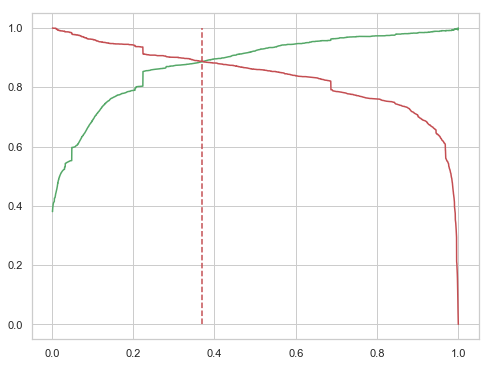

In [126]:
##precision or recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.figure(figsize = (8,6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.37,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

#### **0.37 is the tradeoff between Precision and Recall -**<br>
Thus we can safely choose to consider any Prospect Lead with Conversion Probability higher than 37 % to be a hot Lead

### Step 8: Making predictions on the test set

In [127]:
#Making predictions on the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

C:\Users\AASTHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Buisness,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8786,0,-1.071483,-0.871984,-1.184151,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7813,0,-0.043681,-0.375183,0.390849,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2405,0,1.326721,0.121618,0.653349,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
7246,0,-0.043681,-0.508937,0.390849,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5366,0,0.984121,0.515238,-0.134151,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [128]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost,Tags_No phone number,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
8786,-0.871984,1,0,1,0,0,0,0,0,1,0,1,0
7813,-0.375183,0,0,0,0,0,0,0,0,0,0,1,0
2405,0.121618,0,0,0,0,1,0,0,0,0,1,0,0
7246,-0.508937,0,1,0,0,0,0,0,0,1,0,1,0
5366,0.515238,0,0,0,0,0,0,0,0,0,0,1,0


In [129]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [130]:
#Making Predicition on test set
y_test_pred = res3.predict(X_test_sm)
y_test_pred[:10]

8786    0.754078
7813    0.002411
2405    0.993688
7246    0.070798
5366    0.006331
3924    0.048814
3349    0.012914
916     0.011161
7732    0.072871
1703    0.067708
dtype: float64

In [131]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)

In [132]:
# Let's see the head
y_pred_df.head()

,0
8786,0.754078
7813,0.002411
2405,0.993688
7246,0.070798
5366,0.006331


In [133]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [134]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [135]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,1,8786,0.754078
1,0,7813,0.002411
2,1,2405,0.993688
3,0,7246,0.070798
4,0,5366,0.006331


In [136]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [137]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead ID','Converted','Converted_prob'], axis=1)

In [138]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead ID,Converted,Converted_prob
0,8786,1,0.754078
1,7813,0,0.002411
2,2405,1,0.993688
3,7246,0,0.070798
4,5366,0,0.006331


In [139]:
# Creating new column "Lead Score" with 1to100 using conversion rates
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score
0,8786,1,0.754078,75
1,7813,0,0.002411,0
2,2405,1,0.993688,99
3,7246,0,0.070798,7
4,5366,0,0.006331,1


In [140]:
#Taking 0.37 as the cutoff using precision recall tradeoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)

In [141]:
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted
0,8786,1,0.754078,75,1
1,7813,0,0.002411,0,0
2,2405,1,0.993688,99,1
3,7246,0,0.070798,7,0
4,5366,0,0.006331,1,0


In [142]:
# Let's check the overall accuracy.
print("Model Accuracy on Test data is ",accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Model Accuracy on Test data is  0.9206468597216999


In [143]:
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1530,   97],
       [ 114,  918]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the model on test data is:",TP / float(TP+FN))

Sensitivity of the model on test data is: 0.8895348837209303


In [146]:
# Let us calculate specificity
print("Specificity of the model on test data is:",TN / float(TN+FP))

Specificity of the model on test data is: 0.9403810694529809


In [147]:
#classification report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1627
           1       0.90      0.89      0.90      1032

   micro avg       0.92      0.92      0.92      2659
   macro avg       0.92      0.91      0.92      2659
weighted avg       0.92      0.92      0.92      2659



##  9. Final Observation: <br>
Let us compare the values obtained for Train & Test:

**Train Data:**
 - Accuracy : 91.23%
 - Sensitivity : 91%
 - Specificity : 91.64%
 - Precision : 86%
 - Recall : 91%

**Test Data:**
 - Accuracy : 92.1%
 - Sensitivity : 89%
 - Specificity : 94%
 - Precision : 90%
 - Recall : 89%

<a> The Model seems to predict the Conversion Rate very well. We should be able to help the education company select the most promising Leads or the Hot Leads.

## Step10: The final conclusion:
Let us observe the potential leads & their lead conversion rate

In [149]:
## Let us concatinate predictiona made on test & train dataset
cols1 = y_pred_final.columns
all_leads = pd.concat([y_train_pred_final[cols1],y_pred_final])

# Let us observe the behaviour of leads for various original attributes of the dataframe
all_leads = pd.merge(all_leads,df.reset_index(), left_on = 'Lead ID',right_on = 'index', how = 'left').drop(['Converted_y','index','Lead ID'],axis =1)
all_leads.rename(columns = {'Converted_x':'Converted'}, inplace = True)

# Changing the position of `Lead Number` column
col_position = all_leads.columns.tolist()
col_position.insert(0, col_position.pop(col_position.index('Lead Number')))
all_leads = all_leads.reindex(columns = col_position)
all_leads.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,608267,0,0.223825,22,0,API,Olark Chat,No,0,0,0.0,Email Opened,Management,Unemployed,Others,Mumbai,No,Email Opened
1,584274,1,0.994238,99,1,Landing Page Submission,Google,No,5,1538,2.5,Email Opened,Management,Unemployed,Will revert after reading the email,Thane & Outskirts,No,Email Opened
2,615279,0,0.009046,1,0,Landing Page Submission,Direct Traffic,No,2,69,2.0,Email Link Clicked,Management,Unemployed,Try Calling again,Mumbai,Yes,Email Link Clicked
3,616756,0,0.122017,12,0,Landing Page Submission,Direct Traffic,No,3,349,3.0,Email Opened,Management,Unemployed,Others,Mumbai,Yes,Email Opened
4,639772,0,0.084299,8,0,Landing Page Submission,Direct Traffic,No,7,151,1.4,Email Opened,"Banking, Investment And Insurance",Unemployed,Others,Mumbai,No,Email Opened


#### b) Identifying Hot Leads with conversion rate more than 80% (Lead Score)

Let us observe the relation between lead score, converted & the variables selected in our final regression model.

In [150]:

Hot_leads = all_leads.loc[all_leads['Lead_Score'] > 80,:].sort_values(by = 'Lead_Score', ascending = False)
Hot_leads.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
2249,611029,1,0.995650,100,1,API,Olark Chat,No,0,0,0.0,SMS Sent,Management,Student,Will revert after reading the email,Mumbai,No,SMS Sent
2969,597171,1,0.996974,100,1,Landing Page Submission,Google,No,4,875,4.0,SMS Sent,Management,Unemployed,Will revert after reading the email,Thane & Outskirts,No,SMS Sent
6162,641576,1,0.996643,100,1,Landing Page Submission,Google,No,10,825,5.0,SMS Sent,"Banking, Investment And Insurance",Unemployed,Will revert after reading the email,Mumbai,No,SMS Sent
6169,620376,1,0.995495,100,1,API,Google,No,2,683,2.0,SMS Sent,Management,Unemployed,Will revert after reading the email,Mumbai,No,SMS Sent
2876,588019,1,0.998742,100,1,Lead Add Form,Reference,No,0,0,0.0,SMS Sent,Management,Working Professional,Closed by Horizzon,Mumbai,No,Modified


#### c.) Relationship of the leads with the final variables of regression model

In [152]:
# Concatinating columns from FINAL regression model and lead score on train & test Data

#Concatinating predictions on train & test data
cols2 = y_pred_final.columns
lead_score = pd.concat([y_train_pred_final[cols2],y_pred_final[cols2]])

# concatinating Variables selected in our final regression model
lead_score = pd.merge(lead_score,df_1[cols].reset_index(), left_on = 'Lead ID',right_on = 'index', how = 'left')
lead_score = lead_score.sort_values(by = 'Lead_Score', ascending = False)
lead_score.drop('index',axis = 1,inplace = True)
lead_score.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost,Tags_No phone number,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4087,7236,1,0.998742,100,1,1298,0,0,0,0,1,0,0,0,0,1,0,0
1453,6559,1,0.998191,100,1,1123,0,0,0,0,1,0,0,0,0,1,0,0
7908,4239,1,0.999745,100,1,1619,0,0,0,0,0,1,0,0,0,0,0,0
6425,6647,1,0.999213,100,1,1790,1,0,0,0,0,0,0,0,0,1,0,0
1185,9034,1,0.998684,100,1,1276,0,0,0,0,1,0,0,0,0,1,0,0


### Final Insights:
    
 - When the Company has `limited time and resources`, it should approach `Hot_leads` i.e. those leads who have more than 80% of conversion chances to achieve maximum conversion & to avoid useless phone calls.
 - When the company has `ample amount of resources and time` in its hand, then it should approach all the `Potential Leads`. But since it has sufficient time in its hand, it should also focus on customers who have lesser conversion rate to improve the overall conversion rate of the leads.